In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
print(tf.__version__)

1.15.0


In [4]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

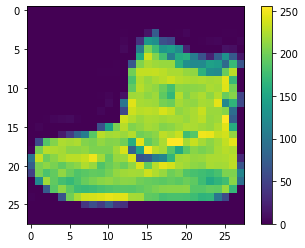

In [6]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

In [0]:
imagens_treino = imagens_treino/float(255)

In [54]:
# https://keras.io/layers/core/
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

# https://keras.io/optimizers/
adam = keras.optimizers.Adam(lr=0.002) # lr: Learning Rate

# https://keras.io/callbacks/
parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                                monitor='val_loss',
                                                save_best_only=True)]

# https://keras.io/models/sequential/#compile
modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# https://keras.io/models/sequential/#fit
historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size=960, #480
                       epochs=5, #5
                       validation_split=0.2, #0.2
                       callbacks=parando_cedo)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 60us/sample - loss: 0.7562 - acc: 0.7358 - val_loss: 0.4958 - val_acc: 0.8275
Epoch 2/5
48000/48000 [==============================] - 1s 31us/sample - loss: 0.4740 - acc: 0.8353 - val_loss: 0.4281 - val_acc: 0.8489
Epoch 3/5
48000/48000 [==============================] - 2s 33us/sample - loss: 0.4202 - acc: 0.8531 - val_loss: 0.3998 - val_acc: 0.8564
Epoch 4/5
48000/48000 [==============================] - 2s 33us/sample - loss: 0.3881 - acc: 0.8639 - val_loss: 0.3804 - val_acc: 0.8689
Epoch 5/5
48000/48000 [==============================] - 2s 33us/sample - loss: 0.3657 - acc: 0.8706 - val_loss: 0.3581 - val_acc: 0.8737


In [27]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 126us/sample - loss: 0.5265 - acc: 0.8115 - val_loss: 0.4332 - val_acc: 0.8411
Epoch 2/5
48000/48000 [==============================] - 6s 118us/sample - loss: 0.3956 - acc: 0.8569 - val_loss: 0.3590 - val_acc: 0.8698
Epoch 3/5
48000/48000 [==============================] - 6s 120us/sample - loss: 0.3597 - acc: 0.8677 - val_loss: 0.3408 - val_acc: 0.8745
Epoch 4/5
48000/48000 [==============================] - 6s 119us/sample - loss: 0.3375 - acc: 0.8775 - val_loss: 0.3496 - val_acc: 0.8720
Epoch 5/5
48000/48000 [==============================] - 6s 119us/sample - loss: 0.3254 - acc: 0.8800 - val_loss: 0.3359 - val_acc: 0.8793


In [34]:
sumario_do_modelo = modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [11]:
pesos_camada_dense = modelo.layers[1].get_weights()
pesos_camada_dense

[array([[ 0.03488285,  0.09635731, -0.00208605, ..., -0.01380427,
          0.15095575, -0.04360946],
        [-0.05865138,  0.12201393,  0.06314967, ...,  0.07635736,
          0.09314372, -0.11129158],
        [ 0.01031265, -0.03338462,  0.21983662, ..., -0.05086117,
         -0.12988636, -0.14153692],
        ...,
        [-0.10867444,  0.06682549, -0.11380198, ..., -0.04762439,
         -0.06700922,  0.07336386],
        [-0.06170419,  0.1038985 , -0.13903594, ...,  0.02925188,
         -0.12656826, -0.07700026],
        [-0.09734629,  0.10596536,  0.04366048, ..., -0.07336525,
         -0.06166075, -0.1110113 ]], dtype=float32),
 array([ 0.06897847,  0.1475212 ,  0.25486302, -0.07402565,  0.33343506,
         0.00163451, -0.05595974,  0.37345427, -0.14344896,  0.00975751,
         0.02265173,  0.01261049,  0.09609389, -0.15734565,  0.17959018,
        -0.00825091,  0.24377148, -0.17260154,  0.21804275, -0.0485111 ,
         0.19937542, -0.03157517, -0.01732121, -0.01409338,  0.166

In [12]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


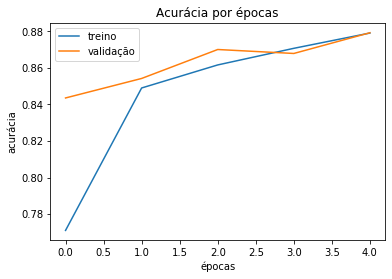

In [35]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

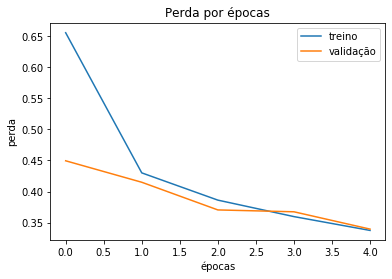

In [36]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [31]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


In [32]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

10000/10000 [==============================] - 0s 43us/sample - loss: 62.1323 - acc: 0.8495
Perda do teste: 62.13229620138245
Acurácia do teste: 0.8495


In [24]:
modelo.get_config()

{'layers': [{'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros',
     'config': {'dtype': 'float32'}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'dtype': 'float32', 'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'bias_

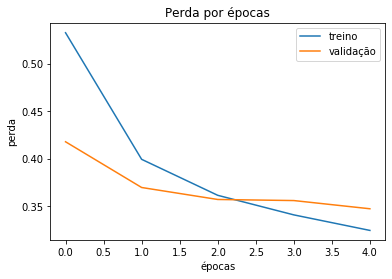

In [25]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [17]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.03488285,  0.09635731, -0.00208605, ..., -0.01380427,
         0.15095575, -0.04360946],
       [-0.05865138,  0.12201393,  0.06314967, ...,  0.07635736,
         0.09314372, -0.11129158],
       [ 0.01031265, -0.03338462,  0.21983662, ..., -0.05086117,
        -0.12988636, -0.14153692],
       ...,
       [-0.10867444,  0.06682549, -0.11380198, ..., -0.04762439,
        -0.06700922,  0.07336386],
       [-0.06170419,  0.1038985 , -0.13903594, ...,  0.02925188,
        -0.12656826, -0.07700026],
       [-0.09734629,  0.10596536,  0.04366048, ..., -0.07336525,
        -0.06166075, -0.1110113 ]], dtype=float32)

In [18]:
pesos_camada_dense.shape

(784, 256)

In [0]:
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

In [21]:
# os vieses são o segundo resultado no array devolvido pela função de pesos
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [0]:
vieses_camada_dense_zerados = np.zeros((256,))

# inicializar os pesos com valores aleatórios e vieses com 0
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

In [23]:
modelo.layers[1].get_weights()

[array([[0.55207986, 0.19373028, 0.42339402, ..., 0.00626858, 0.10042488,
         0.17054112],
        [0.22120298, 0.3957025 , 0.9510775 , ..., 0.74075454, 0.3719013 ,
         0.95452714],
        [0.5829543 , 0.33365265, 0.7530055 , ..., 0.06064096, 0.8643112 ,
         0.28296268],
        ...,
        [0.37163773, 0.6786443 , 0.29397064, ..., 0.3053672 , 0.6479234 ,
         0.48023075],
        [0.12571499, 0.8096389 , 0.8494545 , ..., 0.32370946, 0.19167542,
         0.82653576],
        [0.0267632 , 0.7602363 , 0.504896  , ..., 0.28026125, 0.6635053 ,
         0.81587833]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [0]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense_zerados]
)